In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt

1.12.1+cu113
     |████████████████████████████████| 7.9 MB 5.0 MB/s 
     |████████████████████████████████| 3.5 MB 5.4 MB/s 


In [2]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

cora = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
citeseer = Planetoid(root='data/Planetoid', name='CiteSeer', transform=NormalizeFeatures())

print()
print(f'Dataset: {cora}:')
print('======================')
print(f'Number of graphs: {len(cora)}')
print(f'Number of features: {cora.num_features}')
print(f'Number of classes: {cora.num_classes}')

cora_data = cora[0]  # Get the first graph object.
citeseer_data = citeseer[0]

print()
print(cora_data)
print('===========================================================================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {cora_data.num_nodes}')
print(f'Number of edges: {cora_data.num_edges}')
print(f'Average node degree: {cora_data.num_edges / cora_data.num_nodes:.2f}')
print(f'Number of training nodes: {cora_data.train_mask.sum()}')
print(f'Training node label rate: {int(cora_data.train_mask.sum()) / cora_data.num_nodes:.2f}')
print(f'Has isolated nodes: {cora_data.has_isolated_nodes()}')
print(f'Has self-loops: {cora_data.has_self_loops()}')
print(f'Is undirected: {cora_data.is_undirected()}')

print()
print(f'Dataset: {citeseer}:')
print('======================')
print(f'Number of graphs: {len(citeseer)}')
print(f'Number of features: {citeseer.num_features}')
print(f'Number of classes: {citeseer.num_classes}')
print()
print(citeseer_data)
print('===========================================================================================================')
print(f'Number of nodes: {citeseer_data.num_nodes}')
print(f'Number of edges: {citeseer_data.num_edges}')
print(f'Average node degree: {citeseer_data.num_edges / citeseer_data.num_nodes:.2f}')
print(f'Number of training nodes: {citeseer_data.train_mask.sum()}')
print(f'Training node label rate: {int(citeseer_data.train_mask.sum()) / citeseer_data.num_nodes:.2f}')
print(f'Has isolated nodes: {citeseer_data.has_isolated_nodes()}')
print(f'Has self-loops: {citeseer_data.has_self_loops()}')
print(f'Is undirected: {citeseer_data.is_undirected()}')

Processing...
Done!
Processing...
Done!



Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True

Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


In [3]:
cora_data.edge_index

tensor([[   0,    0,    0,  ..., 2707, 2707, 2707],
        [ 633, 1862, 2582,  ...,  598, 1473, 2706]])

In [4]:
citeseer_data.edge_index
# represented as two arr like 
# [0,1]
# [1,2]
# numbers at the same index indicates a connection i.e. 0-->1, 1-->2

tensor([[   0,    1,    1,  ..., 3324, 3325, 3326],
        [ 628,  158,  486,  ..., 2820, 1643,   33]])

In [5]:
!pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

In [7]:
G_cora = nx.Graph()
for node in range(cora_data.num_nodes):
  G_cora.add_node(node)
for s, t in zip(cora_data.edge_index[0], cora_data.edge_index[1]):
  G_cora.add_edge(int(s), int(t))

In [8]:
len(G_cora.nodes)

2708

In [9]:
len(G_cora.edges)

5278

In [10]:
5278*2
# this is undirected graph, original represtation includes both ways i.e. 0-->1, 1-->0
# so number of edges reduced by half

10556

In [11]:
G_citeseer = nx.Graph()
for node in range(citeseer_data.num_nodes):
  G_citeseer.add_node(node)
for s, t in zip(citeseer_data.edge_index[0], citeseer_data.edge_index[1]):
  G_citeseer.add_edge(int(s), int(t))

In [12]:
len(G_citeseer.nodes)

3327

In [13]:
len(G_citeseer.edges)

4552

In [14]:
4552*2

9104

In [15]:
demo = community_louvain.best_partition(G_cora, random_state = 12)
comm = set(demo.values())
nodes_in_comm = [[] for i in comm] # create a list for each comm, then add nodes in the cluster to it
for node, community in demo.items():
  nodes_in_comm[community].append(node)
nodes_in_comm.sort(key=len, reverse = True)
c=0
for cluster in nodes_in_comm:
  if c > 10: 
    break
  count = [0]*7
  for node in cluster:
    count[cora_data.y.numpy()[node]]+=1
  print(count)
  c+=1

[1, 10, 297, 15, 0, 2, 0]
[12, 164, 7, 17, 9, 6, 0]
[7, 6, 14, 151, 3, 0, 2]
[48, 1, 9, 22, 17, 36, 35]
[4, 2, 0, 5, 1, 124, 8]
[4, 1, 2, 113, 13, 0, 0]
[123, 1, 0, 3, 2, 0, 0]
[26, 0, 0, 4, 2, 21, 71]
[8, 0, 4, 83, 0, 0, 0]
[0, 0, 0, 12, 81, 0, 1]
[0, 0, 0, 6, 86, 0, 0]


In [16]:
demo = community_louvain.best_partition(G_citeseer, random_state = 12)
comm = set(demo.values())
nodes_in_comm = [[] for i in comm] # create a list for each comm, then add nodes in the cluster to it
for node, community in demo.items():
  nodes_in_comm[community].append(node)
nodes_in_comm.sort(key=len, reverse = True)
c=0
for cluster in nodes_in_comm:
  if c > 10: 
    break
  count = [0]*6
  for node in cluster:
    count[citeseer_data.y.numpy()[node]]+=1
  print(count)
  c+=1

[4, 15, 203, 17, 5, 12]
[11, 10, 2, 2, 145, 5]
[9, 0, 20, 133, 3, 0]
[10, 31, 99, 15, 2, 5]
[5, 4, 1, 0, 5, 116]
[5, 36, 51, 19, 6, 2]
[1, 0, 9, 4, 81, 11]
[1, 1, 0, 81, 0, 10]
[2, 57, 22, 7, 1, 0]
[0, 0, 0, 2, 63, 3]
[16, 2, 23, 23, 3, 1]


In [37]:
def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)
# transform min to max because linear assignment found min cost

In [18]:
def clustering_accuracy(cost_matrix, total):
  return cost_matrix[row_ind, col_ind].sum()/total

In [19]:
random_list = [1, 12, 123, 1234, 12345, 123456, 1234567, 12345678, 123456789, 1234567890]

In [20]:
import time
start_time = time.time()
for r in random_list:
  start_time_single_run = time.time()
  partition = community_louvain.best_partition(G_cora, random_state = r)
  print(time.time() - start_time_single_run)
print('total time:', time.time() - start_time)

0.4538900852203369
0.5288553237915039
0.4626026153564453
0.46211934089660645
0.5570478439331055
0.4653472900390625
0.46203136444091797
0.47992563247680664
0.630079984664917
0.507549524307251
total time: 5.015183448791504


In [21]:
start_time = time.time()
for r in random_list:
  start_time_single_run = time.time()
  partition = community_louvain.best_partition(G_citeseer, random_state = r)
  print(time.time() - start_time_single_run)
print('total time:', time.time() - start_time)

0.5733060836791992
0.5722134113311768
0.6080925464630127
0.6083927154541016
0.5046961307525635
0.4988701343536377
0.56571364402771
0.6460440158843994
0.5628113746643066
0.49787378311157227
total time: 5.645583629608154


In [22]:
import numpy as np
from scipy.optimize import linear_sum_assignment as linear_assignment
import seaborn as sb

random state: 1
accuracy: 0.3766617429837518
random state: 12
accuracy: 0.37518463810930575
random state: 123
accuracy: 0.3759231905465288
random state: 1234
accuracy: 0.38220088626292464
random state: 12345
accuracy: 0.38515509601181686
random state: 123456
accuracy: 0.3777695716395864
random state: 1234567
accuracy: 0.38220088626292464
random state: 12345678
accuracy: 0.4054652880354505
random state: 123456789
accuracy: 0.39106351550960117
random state: 1234567890
accuracy: 0.37518463810930575


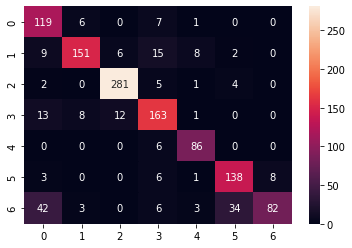

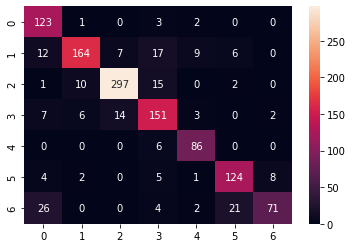

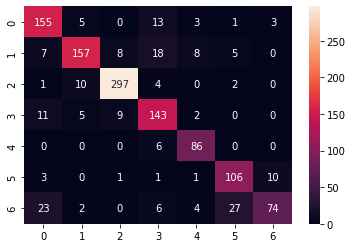

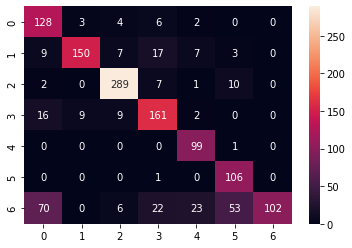

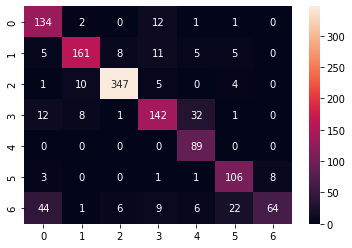

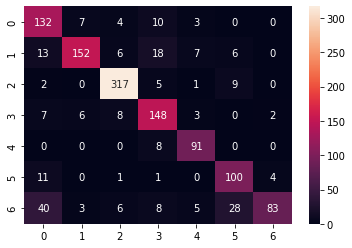

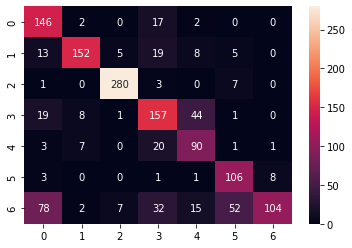

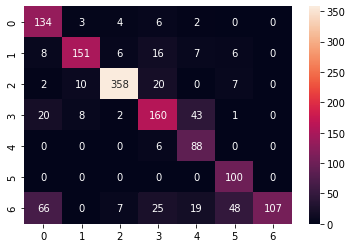

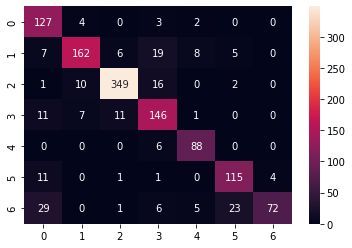

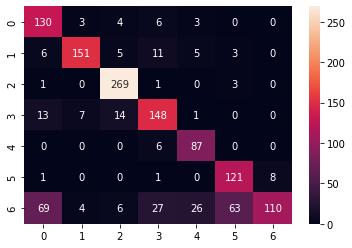

In [23]:
num_true_clusters = cora.num_classes
for r in random_list:
  partition = community_louvain.best_partition(G_cora, random_state = r, resolution = 1)
  comm = set(partition.values())
  nodes_in_comm = [[] for i in comm] # create a list for each comm, then add nodes in the cluster to it
  for node, community in partition.items():
    nodes_in_comm[community].append(node)
  cost_matrix = []
  for cluster in nodes_in_comm:
    count = [0]*num_true_clusters
    for node in cluster:
      count[cora_data.y.numpy()[node]]+=1
    cost_matrix.append(count)
  cost_matrix = np.array(cost_matrix)
  # count true labels for each cluster
  cm = np.array(_make_cost_m(np.array(cost_matrix)))
  row_ind, col_ind = linear_assignment(cm)
  figure = plt.figure()
  print('random state:', r)
  print('accuracy:', clustering_accuracy(cost_matrix, len(G_cora.nodes)))
  new_cm = [[] for i in range(num_true_clusters)]
  for i in range(num_true_clusters):
    new_cm[col_ind[i]] = cost_matrix[row_ind[i]]
  sb.heatmap(new_cm, annot=True, fmt='d')
  # rearrange the cost_matrix according to col_ind, with first row having the selected cost at index 0, 2nd row having cost at index 1 etc.

random state: 1
accuracy: 0.20559062218214608
random state: 12
accuracy: 0.2022843402464683
random state: 123
accuracy: 0.20318605350165314
random state: 1234
accuracy: 0.18665464382326422
random state: 12345
accuracy: 0.2110009017132552
random state: 123456
accuracy: 0.20108205590622183
random state: 1234567
accuracy: 0.19326720769461977
random state: 12345678
accuracy: 0.1956717763751127
random state: 123456789
accuracy: 0.16982266305981364
random state: 1234567890
accuracy: 0.1863540727382026


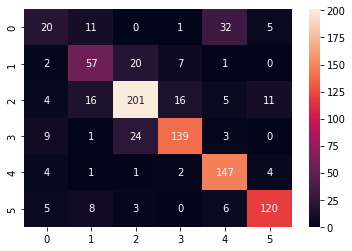

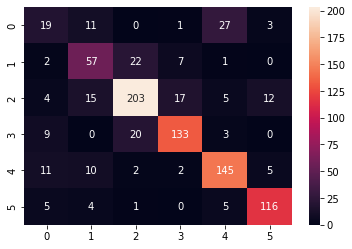

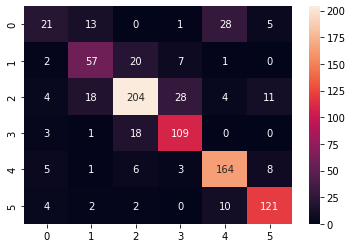

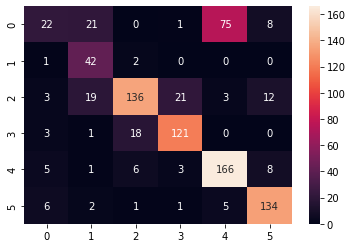

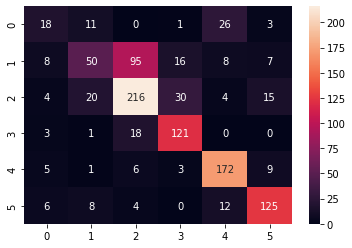

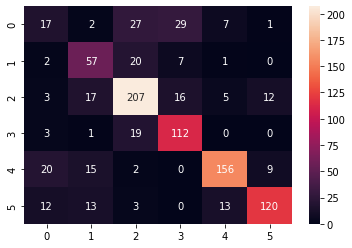

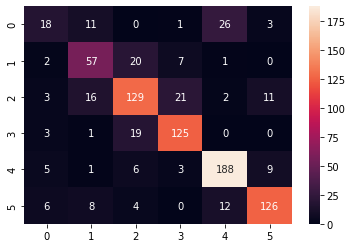

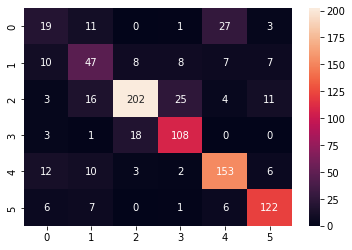

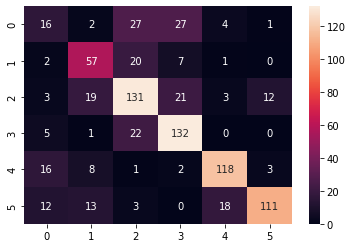

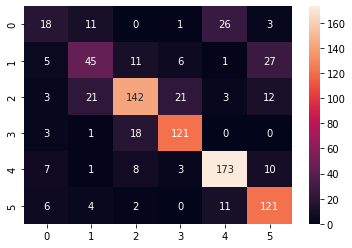

In [24]:
num_true_clusters = citeseer.num_classes
for r in random_list:
  partition = community_louvain.best_partition(G_citeseer, random_state = r, resolution = 1)
  comm = set(partition.values())
  nodes_in_comm = [[] for i in comm] # create a list for each comm, then add nodes in the cluster to it
  for node, community in partition.items():
    nodes_in_comm[community].append(node)
  cost_matrix = []
  for cluster in nodes_in_comm:
    count = [0]*num_true_clusters
    for node in cluster:
      count[citeseer_data.y.numpy()[node]]+=1
    cost_matrix.append(count)
  cost_matrix = np.array(cost_matrix)
  # count true labels for each cluster
  cm = np.array(_make_cost_m(np.array(cost_matrix)))
  row_ind, col_ind = linear_assignment(cm)
  figure = plt.figure()
  print('random state:', r)
  print('accuracy:', clustering_accuracy(cost_matrix, len(G_citeseer.nodes)))
  new_cm = [[] for i in range(num_true_clusters)]
  for i in range(num_true_clusters):
    new_cm[col_ind[i]] = cost_matrix[row_ind[i]]
  sb.heatmap(new_cm, annot=True, fmt='d')
  # rearrange the cost_matrix according to col_ind, with first row having the selected cost at index 0, 2nd row having cost at index 1 etc.

In [25]:
# resolution = range(0.1,1.5,0.1)
# acc = []
num_true_clusters = cora.num_classes
acc_vs_resolution = {}
for re in np.arange(0.1, 1.5, 0.1):
  acc = []
  for r in random_list:
    partition = community_louvain.best_partition(G_cora, random_state = r, resolution = re)
    comm = set(partition.values())
    nodes_in_comm = [[] for i in comm] # create a list for each comm, then add nodes in the cluster to it
    for node, community in partition.items():
      nodes_in_comm[community].append(node)
    cost_matrix = []
    for cluster in nodes_in_comm:
      count = [0]*num_true_clusters
      for node in cluster:
        count[cora_data.y.numpy()[node]]+=1
      cost_matrix.append(count)
    cost_matrix = np.array(cost_matrix)
    # count true labels for each cluster
    cm = np.array(_make_cost_m(np.array(cost_matrix)))
    row_ind, col_ind = linear_assignment(cm)
    print('random state:', r)
    print('resolution:', re)
    accuracy = clustering_accuracy(cost_matrix, len(G_cora.nodes))
    print('accuracy:', accuracy)
    acc.append(accuracy)
  mean_acc_per_re = np.mean(np.array(acc))
  acc_vs_resolution[re] = mean_acc_per_re
    # new_cm = [[] for i in range(num_true_clusters)]
    # for i in range(num_true_clusters):
    #   new_cm[col_ind[i]] = cost_matrix[row_ind[i]]
    # sb.heatmap(new_cm, annot=True, fmt='d')
    # rearrange the cost_matrix according to col_ind, with first row having the selected cost at index 0, 2nd row having cost at index 1 etc.

random state: 1
resolution: 0.1
accuracy: 0.08050221565731167
random state: 12
resolution: 0.1
accuracy: 0.0793943870014771
random state: 123
resolution: 0.1
accuracy: 0.052806499261447565
random state: 1234
resolution: 0.1
accuracy: 0.05945347119645495
random state: 12345
resolution: 0.1
accuracy: 0.06794682422451995
random state: 123456
resolution: 0.1
accuracy: 0.056129985228951254
random state: 1234567
resolution: 0.1
accuracy: 0.05096011816838995
random state: 12345678
resolution: 0.1
accuracy: 0.07385524372230429
random state: 123456789
resolution: 0.1
accuracy: 0.061669128508124074
random state: 1234567890
resolution: 0.1
accuracy: 0.08382570162481537
random state: 1
resolution: 0.2
accuracy: 0.2895125553914328
random state: 12
resolution: 0.2
accuracy: 0.29098966026587886
random state: 123
resolution: 0.2
accuracy: 0.28360413589364847
random state: 1234
resolution: 0.2
accuracy: 0.258493353028065
random state: 12345
resolution: 0.2
accuracy: 0.28064992614475626
random state: 12

In [26]:
acc_vs_resolution

{0.1: 0.06665435745937962,
 0.2: 0.25878877400295425,
 0.30000000000000004: 0.26805760709010334,
 0.4: 0.287629246676514,
 0.5: 0.3277695716395864,
 0.6: 0.36251846381093056,
 0.7000000000000001: 0.4176883308714919,
 0.8: 0.4064254062038405,
 0.9: 0.4034711964549483,
 1.0: 0.38268094534711966,
 1.1: 0.36517725258493355,
 1.2000000000000002: 0.3427991137370753,
 1.3000000000000003: 0.3304652880354505,
 1.4000000000000001: 0.3149556868537667}

Text(0, 0.5, 'accuracy')

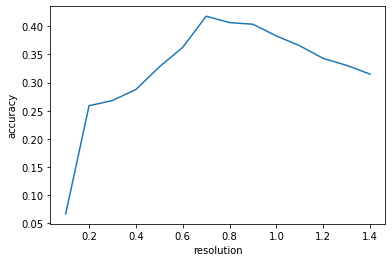

In [28]:
plt.plot(list(acc_vs_resolution.keys()),list(acc_vs_resolution.values()))
plt.xlabel('resolution')
plt.ylabel('accuracy')

In [29]:
num_true_clusters = citeseer.num_classes
acc_vs_resolution = {}
for re in np.arange(0.1, 1.5, 0.1):
  acc = []
  for r in random_list:
    partition = community_louvain.best_partition(G_citeseer, random_state = r, resolution = re)
    comm = set(partition.values())
    nodes_in_comm = [[] for i in comm] # create a list for each comm, then add nodes in the cluster to it
    for node, community in partition.items():
      nodes_in_comm[community].append(node)
    cost_matrix = []
    for cluster in nodes_in_comm:
      count = [0]*num_true_clusters
      for node in cluster:
        count[citeseer_data.y.numpy()[node]]+=1
      cost_matrix.append(count)
    cost_matrix = np.array(cost_matrix)
    # count true labels for each cluster
    cm = np.array(_make_cost_m(np.array(cost_matrix)))
    row_ind, col_ind = linear_assignment(cm)
    print('random state:', r)
    print('resolution:', re)
    accuracy = clustering_accuracy(cost_matrix, len(G_citeseer.nodes))
    print('accuracy:', accuracy)
    acc.append(accuracy)
  mean_acc_per_re = np.mean(np.array(acc))
  acc_vs_resolution[re] = mean_acc_per_re

random state: 1
resolution: 0.1
accuracy: 0.037270814547640516
random state: 12
resolution: 0.1
accuracy: 0.041178238653441536
random state: 123
resolution: 0.1
accuracy: 0.05139765554553652
random state: 1234
resolution: 0.1
accuracy: 0.04658851818455065
random state: 12345
resolution: 0.1
accuracy: 0.047790802524797116
random state: 123456
resolution: 0.1
accuracy: 0.04658851818455065
random state: 1234567
resolution: 0.1
accuracy: 0.04959422903516682
random state: 12345678
resolution: 0.1
accuracy: 0.050796513375413285
random state: 123456789
resolution: 0.1
accuracy: 0.0474902314397355
random state: 1234567890
resolution: 0.1
accuracy: 0.0474902314397355
random state: 1
resolution: 0.2
accuracy: 0.11812443642921551
random state: 12
resolution: 0.2
accuracy: 0.11722272317403065
random state: 123
resolution: 0.2
accuracy: 0.14397354974451457
random state: 1234
resolution: 0.2
accuracy: 0.10640216411181244
random state: 12345
resolution: 0.2
accuracy: 0.11782386534415389
random state:

In [30]:
acc_vs_resolution

{0.1: 0.04661857529305681,
 0.2: 0.113014727983168,
 0.30000000000000004: 0.1255184851217313,
 0.4: 0.12010820559062216,
 0.5: 0.17415088668470097,
 0.6: 0.2125037571385633,
 0.7000000000000001: 0.2032461677186655,
 0.8: 0.21097084460474905,
 0.9: 0.2106702735196874,
 1.0: 0.19549143372407576,
 1.1: 0.18809738503155995,
 1.2000000000000002: 0.17436128644424406,
 1.3000000000000003: 0.16236850015028553,
 1.4000000000000001: 0.16002404568680495}

Text(0, 0.5, 'accuracy')

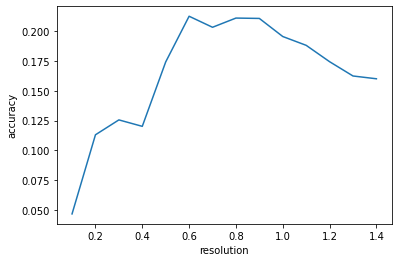

In [31]:
plt.plot(list(acc_vs_resolution.keys()),list(acc_vs_resolution.values()))
plt.xlabel('resolution')
plt.ylabel('accuracy')